<a href="https://colab.research.google.com/github/Henry-Medeiros/programming-challenge-3-GritYu/blob/main/Programming_Challenge__3_Hongkun_Yu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2020-11-24 01:29:36--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159777 (156K) [image/jpeg]
Saving to: ‘organisms.jpg.1’

organisms.jpg.1     100%[===================>] 156.03K  --.-KB/s    in 0.02s   

2020-11-24 01:29:36 (8.61 MB/s) - ‘organisms.jpg.1’ saved [159777/159777]



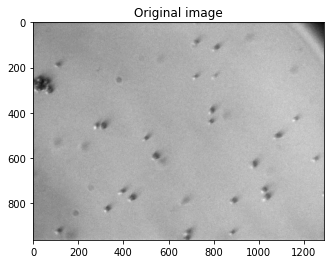

In [39]:
# The image below corresponds to a snapshot of single cell organisms observed with a microscope
import cv2
import matplotlib.pyplot as plt
import numpy as np

!wget "https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg"
img = cv2.imread('organisms.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, 0) 
img = np.array(img)#translate the image to np matrix for computing
# visualization only
plt.imshow(img, 'gray')
plt.title('Original image')
plt.show()

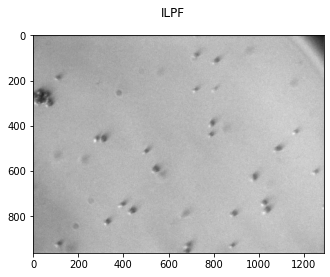

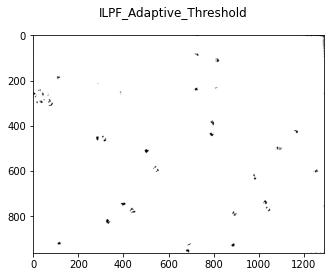

In [40]:
# Binarize the image to separate the organisms from the background
# Hint 1: You may need to remove some high-frequency noise from the image 
# before thresholding
# Hint 2: The background illumination in the image varies significantly, so a 
# single treshold for the entire will not work
#import fftim for fourier transform
import scipy.fftpack as fftim
#do fourier transform
fft_img = np.fft.fft2(img, s=None, axes=(-2,-1))
#shift the image of fourier transform, get a new center with the highest amplitude
f_shift_i = np.fft.fftshift(fft_img)
#plotMagnitude(f_shift_i)

dims = img.shape
#d0 is the cut-off frequency
d0 = 200

x =range(dims[1])
y = range(dims[0])
xv,yv = np.meshgrid(x,y)
#calculate the Euclidean distance from origin
duv = np.linalg.norm([xv - dims[1]/2, yv - dims[0]/2], axis = 0)


#lopass means the output frequency should small than cut-off frequency
ilpf_msk = duv <d0

#calculate the convolution of ifft_image with the filter
filt_fft_img_ilpf = f_shift_i* ilpf_msk

#Inverse the filtered image
filt_ifft_img_ilpf = fftim.ifft2(filt_fft_img_ilpf)

#Normalization
img3 = abs(filt_ifft_img_ilpf)
img3 = (img3/np.max(img3)*255).astype('uint8')
img3=np.array(img3)

#for visulization
plt.imshow(img3,'gray')
plt.suptitle('ILPF')
plt.show()

#find the max value of image
img_max_3 = np.max(img3)

#caculate the adaptiveThreshold
thresh1 = cv2.adaptiveThreshold(img3, img_max_3, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,21,11)
#for visulization
plt.imshow(thresh1,'gray')
plt.suptitle('ILPF_Adaptive_Threshold')
plt.show()



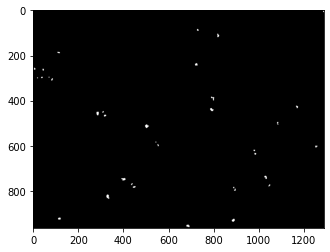

In [41]:
# Locate and plot the organisms present in the image
# Hint 3: You will need to apply a morphological filter to your binarized image 
# to remove spurious pixels left over by the binarization step
# morphological filter to close the objects

#set the kernel as 4*4
se = np.ones((4,4), np.uint8)
img_thresh =  255 - thresh1
#use OPEN to filter my binarized image to remove spurious pixels left over by the binarization step
img_close = cv2.morphologyEx(img_thresh,cv2.MORPH_OPEN,se)
#for visulization
plt.imshow(img_close,'gray')
plt.show()


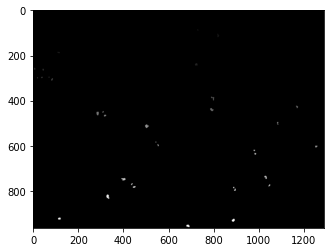

The number of organisms are 37
The sum_area is 2494
The average area is 67.4054054054054


In [42]:
# Count the the number of organisms present in the image and compute their 
# average area in pixels
from skimage import data, util
from skimage.measure import label, regionprops
#calculate labels
label_img,num = label(img_close,return_num=True)
#for visulization
plt.imshow(label_img,'gray')
plt.show()
#import regionprops
from skimage.measure import regionprops
sum = 0
#calcualte object area
img_props = regionprops(label_img)
for i in img_props:
  sum = sum+i.area# sum the whole area
print("The number of organisms are {}".format(num))
print("The sum_area is {}".format(sum))
print("The average area is {}".format(sum/num))
